浙江省政府工作报告文本分析

### 爬虫获取政府工作报告原始文本

In [1]:
### 导入相关库
from urllib import request
import re
import jieba
import jieba.posseg as pseg
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
### 定义get方法爬虫函数
def get(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'}
    req = request.Request(url, headers=headers)
    res = request.urlopen(req)
    html = res.read().decode('utf-8')
    return html

In [3]:
### 获取发布政府工作报告的网页链接
url0 = 'https://www.zj.gov.cn/col/col1229019379/index.html'
html0 = get(url0)
#print(html0)
p_link= r"<a.*?href=.*?</a>"
pattern = r'href="(/art/\d{4}/\d+/\d+/art_\d+_\d+\.html)"'
links = re.findall(pattern, html0)
print(links)



['/art/2024/1/31/art_1229019379_5259140.html', '/art/2023/1/17/art_1229019379_5056991.html', '/art/2022/1/24/art_1229019379_4865173.html', '/art/2021/2/2/art_1229019379_4445148.html', '/art/2020/1/19/art_1229019379_1253.html', '/art/2019/2/27/art_1229019379_1252.html', '/art/2018/2/7/art_1229019379_1251.html', '/art/2017/5/22/art_1229019379_1250.html', '/art/2017/4/13/art_1229019379_1249.html', '/art/2015/6/18/art_1229019379_1248.html', '/art/2014/5/29/art_1229019379_1247.html', '/art/2013/11/1/art_1229019379_1267.html', '/art/2013/11/1/art_1229019379_1246.html', '/art/2012/4/6/art_1229019379_1245.html', '/art/2012/4/6/art_1229019379_1244.html', '/art/2012/4/6/art_1229019379_1243.html', '/art/2012/4/6/art_1229019379_1234.html', '/art/2012/4/6/art_1229019379_1242.html', '/art/2012/4/6/art_1229019379_1241.html', '/art/2012/4/6/art_1229019379_1240.html', '/art/2012/4/6/art_1229019379_1239.html', '/art/2012/4/6/art_1229019379_1238.html', '/art/2012/4/6/art_1229019379_1237.html', '/art/2012

In [ ]:
### 获取历年政府工作报告的标题和内容
for i in range(20):
    url = 'https://www.zj.gov.cn' + links[i]
    html = get(url)
    title = re.findall(r'<title>([^<]+)</title>', html)[0]
    content_pattern = re.compile(r"<div class='contbox'>(.*?)<!-- visitcount Begin -->", re.S)
    content = re.findall(content_pattern, html)
    with open('D:/note_3rd_1/DASI/data0/浙江省/' + title + '.txt', 'w', encoding='utf-8') as f:
        f.write(content[0]) 
    print(title)
        




2024年政府工作报告
2023年政府工作报告
2022年政府工作报告
2021年政府工作报告
2020年政府工作报告
2019年政府工作报告
2018年政府工作报告
2017年政府工作报告
2016年政府工作报告
2015年政府工作报告
2014年政府工作报告
2013年政府工作报告
2012年政府工作报告
2011年政府工作报告
2010年政府工作报告
2009年政府工作报告
2008年政府工作报告
2007年政府工作报告
2006年政府工作报告
2005年政府工作报告


### 对原始文本进行分词

In [5]:
### 定义分词函数
def tokenize(text):
    words = pseg.lcut(text, HMM=True) # 使用jieba分词并进行词性标注，开启HMM提高分词准确率
    with open('cn_stopwords.txt', 'r', encoding='utf-8') as f: # 加载中文停用词表
        stopwords = f.read().split('\n')
        stopwords.extend(['年月日', '宋体', '楷体', '黑体', '浙江省', '浙江', '工作', '习近平','主题',]) # 视情况手动补充停用词
        filtered_words = [
            word.word for word in words
            if word.word not in stopwords # 去除停用词
            and len(word.word) > 1 # 去除单字词
            and word.flag not in ['c', 'd', 'm', 'nr', 'ns', 'p', 'q', 'r', 'v', 't'] # 去除指定词性词
            ]
    return filtered_words

In [6]:
### 分词后，保存到DataFrame
df = pd.DataFrame(columns=['year', 'tokens'])
for i in range(2005, 2025):
    with open('D:/note_3rd_1/DASI/data0/浙江省/'+str(i) + '年政府工作报告.txt', 'r', encoding='utf-8') as f:
        text = f.read()
        ctext = ''.join(re.findall(r'[\u4e00-\u9fff]+', text)) # 只保留中文字符
        words = tokenize(ctext) # 分词
        df.loc[df.shape[0] + 1] = {'year': i, 'tokens': ' '.join(words)}
df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\12696\AppData\Local\Temp\jieba.cache
Loading model cost 0.487 seconds.
Prefix dict has been built successfully.


,year,tokens
1,2005,分类 政府 机构 省政府 办公厅 成文 分类 政府 机构 省政府 办公厅 成文 政府 报告 ...
2,2006,分类 政府 机构 省政府 办公厅 成文 分类 政府 机构 省政府 办公厅 成文 政府 报告 ...
3,2007,分类 政府 机构 省政府 办公厅 成文 分类 政府 机构 省政府 办公厅 成文 政府 报告 ...
4,2008,分类 政府 机构 省政府 办公厅 成文 分类 政府 机构 省政府 办公厅 成文 政府 报告 ...
5,2009,分类 政府 机构 省政府 办公厅 成文 分类 政府 机构 省政府 办公厅 成文 政府 报告 ...
6,2010,分类 政府 机构 省政府 办公厅 成文 分类 政府 机构 省政府 办公厅 成文 政府 报告 ...
7,2011,分类 政府 机构 省政府 办公厅 成文 分类 政府 机构 省政府 办公厅 成文 政府 报告 ...
8,2012,分类 政府 机构 省政府 办公厅 成文 分类 政府 机构 省政府 办公厅 成文 政府 报告 ...
9,2013,分类 政府 机构 省政府 办公厅 成文 分类 政府 机构 省政府 办公厅 成文 政府 报告 ...
10,2014,分类 政府 机构 省政府 办公厅 成文 分类 政府 机构 省政府 办公厅 成文 政府 报告 ...


## 关键词分析

### 提取每年政府工作报告中的关键词

In [7]:
### 导入相关库
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
### 计算TF-IDF值
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['tokens']) # 生成TF-IDF值矩阵
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=df['year']) # 转换为DataFrame
tfidf_df

,一业,一以贯之,一体,一体化,一刀切,一切办法,一卡通,一地,一季度,一带,...,黄酒,黄金,黑恶,黑恶势力,黑治,鼓励类,齐心协力,龙头,龙头企业,龙游
year,,,,,,,,,,,,,,,,,,,,,
2005,0.000000,0.000000,0.000000,0.012686,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.011878,0.000000,0.000000,0.009083,0.000000,0.005128,0.000000
2006,0.000000,0.000000,0.000000,0.016946,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007,0.000000,0.000000,0.008246,0.004681,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011355,0.000000
2008,0.000000,0.000000,0.000000,0.020555,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004986,0.000000
2009,0.000000,0.000000,0.000000,0.008960,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009623,0.000000,0.005433,0.000000
2010,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.019897,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010393,0.000000
2011,0.000000,0.000000,0.000000,0.012352,0.000000,0.00000,0.007827,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.009868,0.006633,0.000000,0.003745,0.000000
2012,0.000000,0.000000,0.000000,0.006710,0.000000,0.00000,0.008504,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020140,0.008138,0.000000
2013,0.000000,0.000000,0.000000,0.016018,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008602,0.008013,0.004857,0.000000


In [9]:
### 提取TF-IDF值最高的关键词
topwords_df = pd.DataFrame(columns=['year', 'topwords'])
for i in tfidf_df.index:
    tfidf_scores = tfidf_df.loc[i]
    topwords = tfidf_scores.sort_values(ascending=False).index.tolist() # 根据TF-IDF值从高到低排序，提取每年的关键词
    topwords_df.loc[topwords_df.shape[0] + 1] = {'year': i, 'topwords': ' '.join(topwords)}
topwords_df

,year,topwords
1,2005,发展 建设 社会 积极 地区 企业 经济 农村 城乡 政府 制度 全省 农业 重点 欠发达 ...
2,2006,建设 发展 经济 农村 社会 欠发达 积极 政府 地区 工程 体系 年均 水平 全省 文化 ...
3,2007,建设 发展 农村 社会 积极 制度 企业 欠发达 工程 地区 政府 经济 管理 全面 努力 ...
4,2008,发展 建设 社会 基本 农村 政府 经济 制度 体系 文化 人民 健全 地区 重点 全面 欠...
5,2009,发展 企业 建设 经济 农村 积极 政府 重点 大力 社会 服务 努力 制度 政策 改革 产...
6,2010,发展 建设 企业 经济 农村 重点 社会 积极 政府 产业 服务 大力 改革 政策 基本 工...
7,2011,发展 建设 经济 社会 企业 年均 工程 重点 改革 服务业 全面 基本 全省 积极 农村 ...
8,2012,发展 建设 经济 改革 政府 企业 健全 工程 机制 管理 重点 社会 试点 体系 综合 产...
9,2013,建设 发展 社会 改革 经济 产业 政府 机制 文化 体系 企业 管理 城乡 综合 重点 工...
10,2014,建设 发展 改革 积极 政府 制度 社会 经济 企业 试点 重点 机制 投资 转型 体系 城...


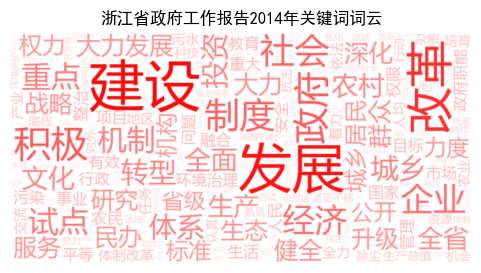

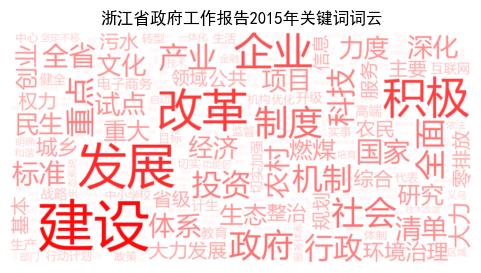

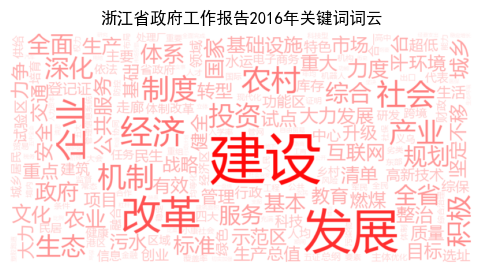

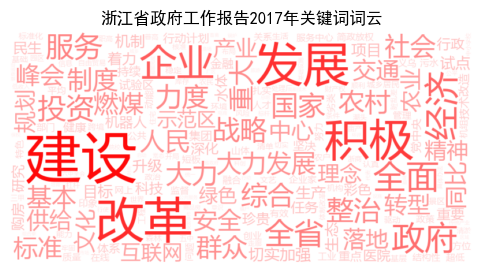

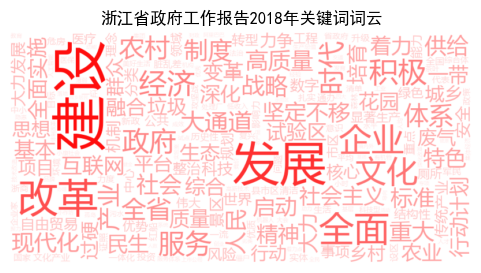

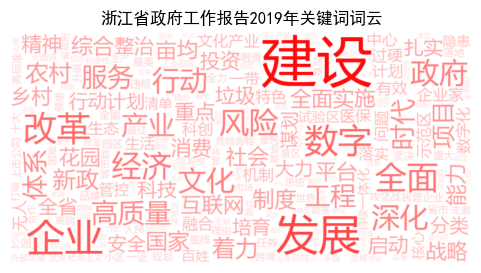

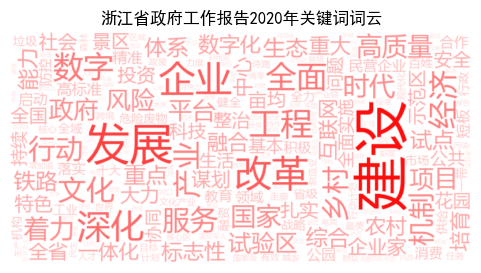

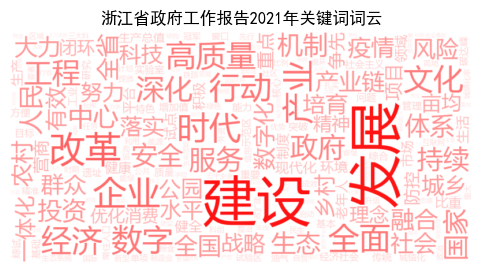

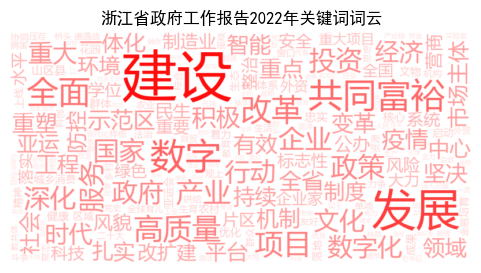

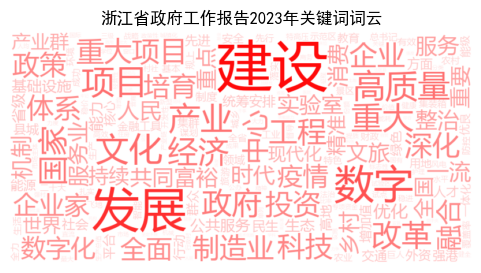

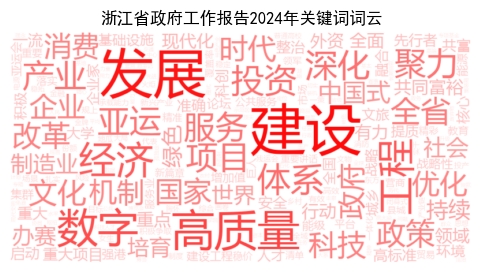

In [10]:
### 通过词云图可视化
def color_func(word, font_size, position, orientation, random_state=None, **kwargs): # 定义词云颜色
    hue = 0
    lightness = 100 - (font_size / 100) * 50
    return "hsl({}, 100%, {}%)".format(hue, lightness)

def generate_wordcloud(year, tfidf_scores):
    wordcloud = WordCloud(font_path='msyh.ttc',
                          width=800,
                          height=400,
                          background_color='white',
                          color_func=color_func
                          ).generate_from_frequencies(tfidf_scores) # 根据TF-IDF值生成词云
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'浙江省政府工作报告{year}年关键词词云')
    plt.axis('off')
    plt.show()

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
for year in range(2014, 2025): # 生成近10年的词云图
    tfidf_scores = tfidf_df.loc[year]
    generate_wordcloud(year, tfidf_scores)

### 构建政府数字技术关注度指标

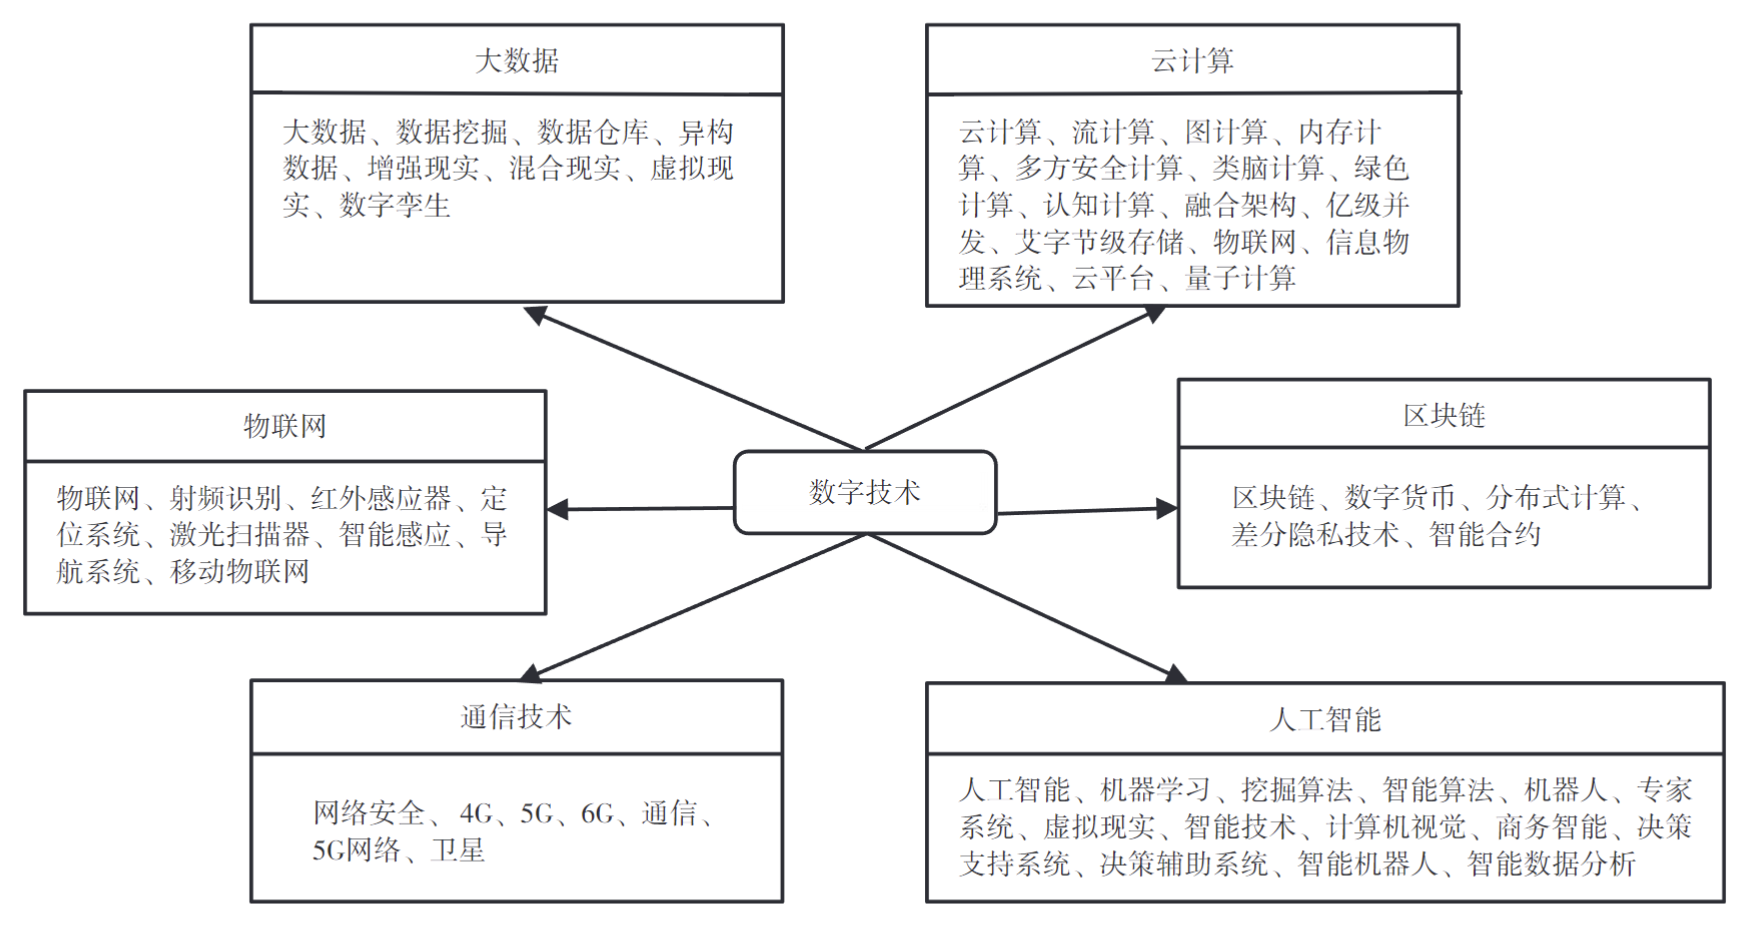

In [11]:
### 构建数字技术关键词列表
digital_words = {'大数据': ['大数据', '数据挖掘', '数据仓库', '异构数据', '增强现实', '混合现实', '虚拟现实', '数字孪生'],
                 '云计算': ['云计算', '流计算', '内存计算', '多方安全计算', '类脑计算', '绿色计算', '认知计算', '融合架构', '亿级并发', '艾字节级存储', '信息物理系统', '云平台', '量子计算'],
                 '物联网': ['物联网', '射频识别', '红外感应器', '定位系统', '激光扫描仪', '智能感应', '导航系统', '移动物联网'],
                 '通信技术': ['网络安全', '4G', '5G', '6G', '通信', '5G网络', '卫星'],
                 '区块链': ['区块链', '数字货币', '分布式计算', '差分隐私技术', '智能合约'],
                 '人工智能': ['人工智能', '机器学习', '挖掘算法', '智能算法', '机器人', '专家系统', '虚拟现实', '智能技术', '计算机视觉', '商务智能', '决策支持系统', '决策辅助系统', '智能机器人', '智能数据分析']}

In [12]:
### 计算数字技术关注度
digital_df = pd.DataFrame(columns=['year', 'total', 'bigdata', 'cloud', 'iot', 'communication', 'blockchain', 'ai'])
for i in df.index:
    year = df.loc[i, 'year']
    words = df.loc[i, 'tokens'].split(' ')
    bigdata = []
    cloud = []
    iot = []
    communication = []
    blockchain = []
    ai = []
    for word in words:
        if word in digital_words['大数据']:
            bigdata.append(word)
        if word in digital_words['云计算']:
            cloud.append(word)
        if word in digital_words['物联网']:
            iot.append(word)
        if word in digital_words['通信技术']:
            communication.append(word)
        if word in digital_words['区块链']:
            blockchain.append(word)
        if word in digital_words['人工智能']:
            ai.append(word)
    total = bigdata + cloud + iot + communication + blockchain + ai
    digital_df.loc[digital_df.shape[0] + 1] = {'year': year,
                                               'total': len(total) / len(words) * 1000,
                                               'bigdata': len(bigdata) / len(words) * 1000,
                                               'cloud': len(cloud) / len(words) * 1000,
                                               'iot': len(iot) / len(words) * 1000,
                                               'communication': len(communication) / len(words) * 1000,
                                               'blockchain': len(blockchain) / len(words) * 1000,
                                               'ai': len(ai) / len(words) * 1000}
digital_df

,year,total,bigdata,cloud,iot,communication,blockchain,ai
1,2005,0.278707,0.0,0.0,0.278707,0.000000,0.0,0.000000
2,2006,0.289939,0.0,0.0,0.000000,0.289939,0.0,0.000000
3,2007,0.613874,0.0,0.0,0.000000,0.613874,0.0,0.000000
4,2008,1.024853,0.0,0.0,0.000000,1.024853,0.0,0.000000
5,2009,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
6,2010,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
7,2011,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
8,2012,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
9,2013,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
10,2014,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000


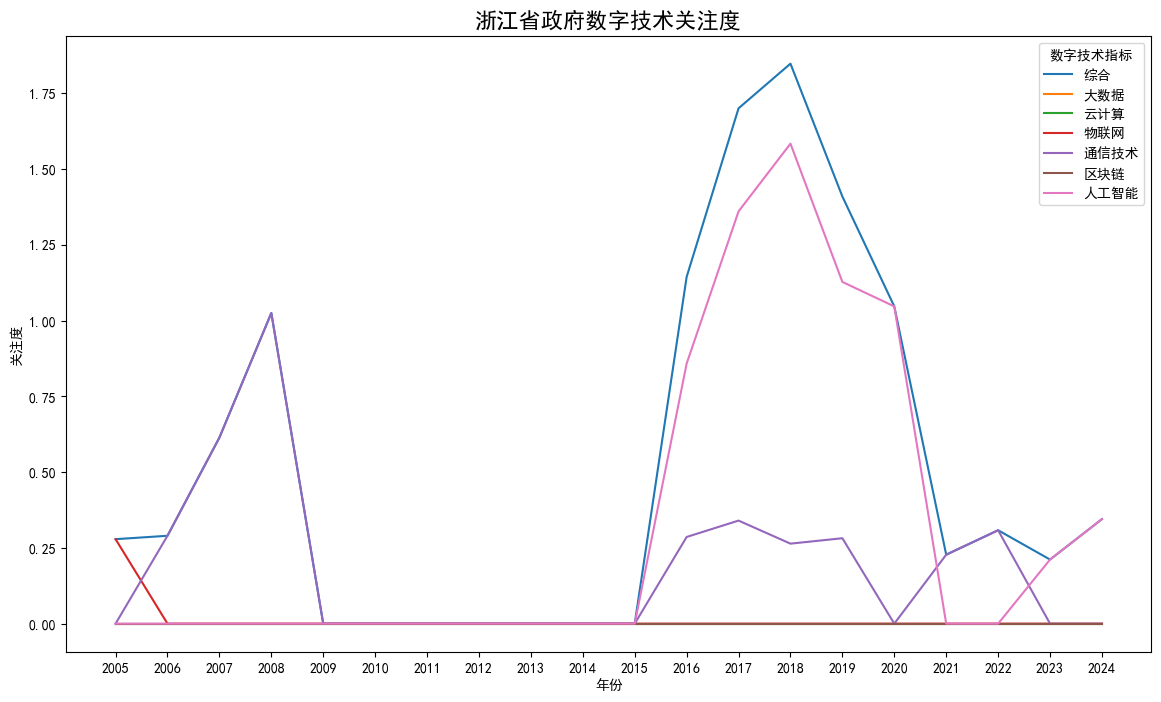

In [13]:
### 可视化
import seaborn as sns

plt.figure(figsize=(14, 8))

sns.lineplot(data=digital_df, x='year', y='total', label='综合')
sns.lineplot(data=digital_df, x='year', y='bigdata', label='大数据')
sns.lineplot(data=digital_df, x='year', y='cloud', label='云计算')
sns.lineplot(data=digital_df, x='year', y='iot', label='物联网')
sns.lineplot(data=digital_df, x='year', y='communication', label='通信技术')
sns.lineplot(data=digital_df, x='year', y='blockchain', label='区块链')
sns.lineplot(data=digital_df, x='year', y='ai', label='人工智能')

plt.legend(title='数字技术指标')
plt.title('浙江省政府数字技术关注度', fontsize=16)
plt.xlabel('年份')
plt.ylabel('关注度')

plt.xticks(ticks=range(digital_df['year'].min(), digital_df['year'].max() + 1, 1))

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

### 数字技术关注度与经济发展水平

In [14]:
### 读取经济数据
df_econ = pd.read_excel('D:/note_3rd_1/DASI/data0/浙江省经济数据.xlsx').iloc[:-1, :]
df_econ['指标名称'] = pd.to_datetime(df_econ['指标名称'])
df_econ_filtered = df_econ[(df_econ['指标名称'] >= pd.to_datetime('2014-01-01')) & (df_econ['指标名称'] <= pd.to_datetime('2023-12-31'))]
df_econ_filtered['指标名称'] = df_econ_filtered['指标名称'].dt.year
df_econ_filtered.columns = ['year', 'gdp', 'gdp_1','gdp_2', 'gdp_3','income','income_country', 'income_city']
for i in df_econ_filtered.index:
    year = df_econ_filtered.loc[i, 'year']
    df_econ_filtered.loc[i, 'digital'] = digital_df[digital_df['year'] == year]['total'].values[0]
df_econ_filtered

d:\python_app\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)
C:\Users\12696\AppData\Local\Temp\ipykernel_50428\2926241516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_econ_filtered['指标名称'] = df_econ_filtered['指标名称'].dt.year
C:\Users\12696\AppData\Local\Temp\ipykernel_50428\2926241516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_econ_filtered.loc[i, 'digital'] = digital_df[digital_df['year'] == y

,year,gdp,gdp_1,gdp_2,gdp_3,income,income_country,income_city,digital
0,2023,82553.20,2332.00,33952.70,46268.60,63830.0,40311.0,74997.00,0.211461
1,2022,78060.60,2185.20,32973.80,42901.60,60302.0,37565.0,71267.93,0.308166
2,2021,74040.78,2211.70,31173.99,40655.09,57541.0,35247.0,68486.80,0.227531
3,2020,64689.06,2166.26,26361.50,36161.30,52397.0,31930.5,62699.00,1.046572
4,2019,62461.99,2086.70,26299.51,34075.77,49899.0,29875.8,60182.00,1.409245
5,2018,58002.80,1975.90,25308.10,30718.80,45840.0,27302.4,55574.00,1.847453
6,2017,52403.10,1933.90,23246.70,27222.50,42046.0,24955.8,51261.00,1.700102
7,2016,47254.00,1890.40,21571.30,23792.40,38529.0,22866.1,47237.18,1.143838
8,2015,43507.70,1771.40,20606.60,21129.80,35537.0,21125.0,43714.48,0.000000
9,2014,40023.50,1726.60,19580.70,18716.20,32658.0,19373.3,40392.72,0.000000


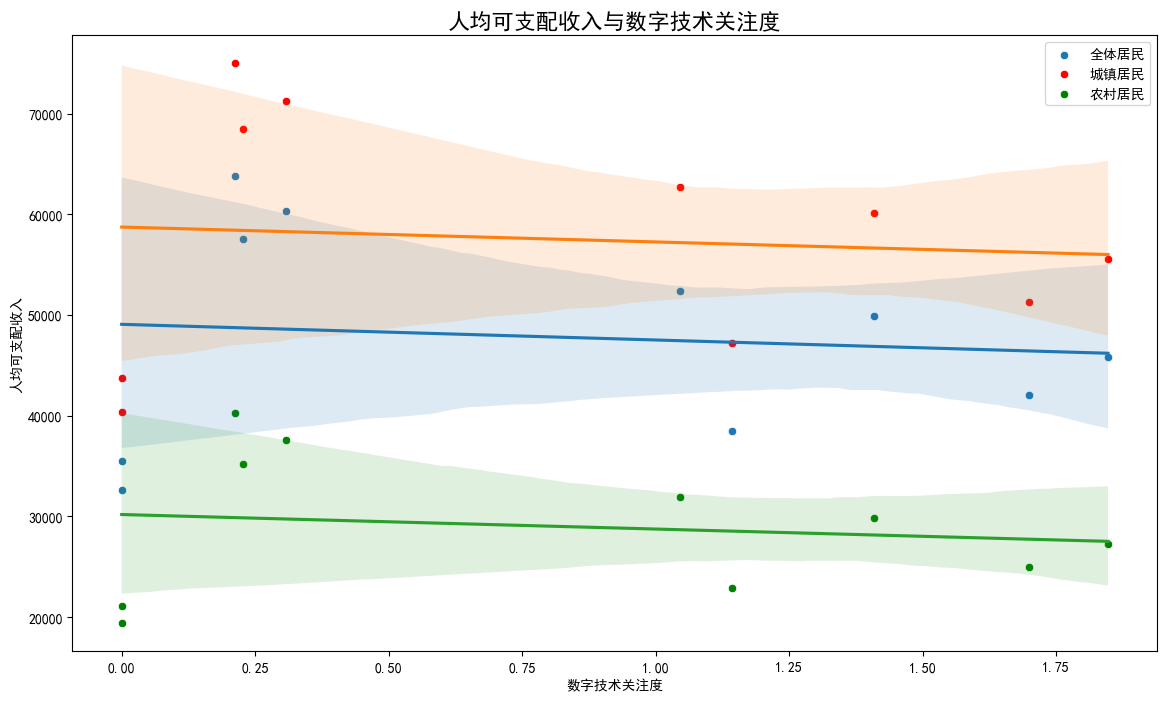

In [15]:
### 可视化
plt.figure(figsize=(14, 8))

sns.scatterplot(data=df_econ_filtered, x='digital', y='income')
sns.scatterplot(data=df_econ_filtered, x='digital', y='income_city', color='r')
sns.scatterplot(data=df_econ_filtered, x='digital', y='income_country', color='g')

sns.regplot(data=df_econ_filtered, x='digital', y='income', scatter=False)
sns.regplot(data=df_econ_filtered, x='digital', y='income_city', scatter=False)
sns.regplot(data=df_econ_filtered, x='digital', y='income_country', scatter=False)

plt.legend(labels=['全体居民', '城镇居民', '农村居民'])
plt.xlabel('数字技术关注度')
plt.ylabel('人均可支配收入')
plt.title('人均可支配收入与数字技术关注度', fontsize=16)

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

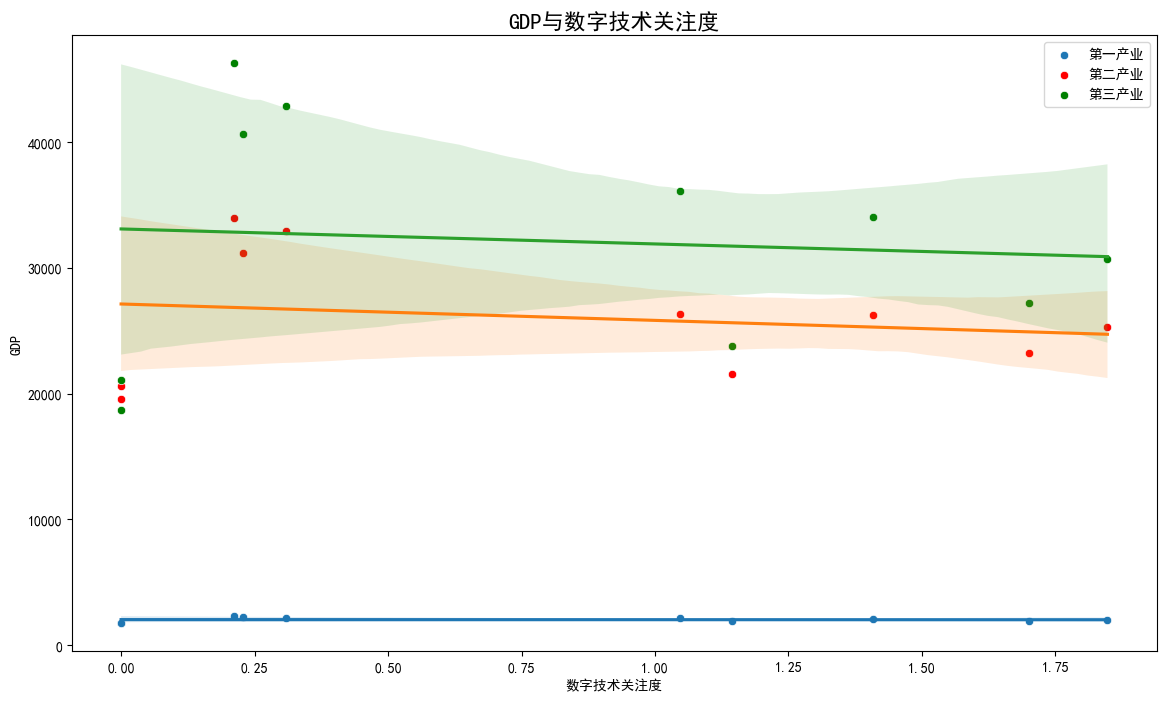

In [16]:
### 可视化
plt.figure(figsize=(14, 8))

sns.scatterplot(data=df_econ_filtered, x='digital', y='gdp_1')
sns.scatterplot(data=df_econ_filtered, x='digital', y='gdp_2', color='r')
sns.scatterplot(data=df_econ_filtered, x='digital', y='gdp_3', color='g')

sns.regplot(data=df_econ_filtered, x='digital', y='gdp_1', scatter=False)
sns.regplot(data=df_econ_filtered, x='digital', y='gdp_2', scatter=False)
sns.regplot(data=df_econ_filtered, x='digital', y='gdp_3', scatter=False)

plt.legend(labels=['第一产业', '第二产业', '第三产业'])
plt.xlabel('数字技术关注度')
plt.ylabel('GDP')
plt.title('GDP与数字技术关注度', fontsize=16)

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()